In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 

## 1. Data Description

# `spotify_songs.csv`

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |
|track_genre              |character | The genres of a track


## 2. Data Exploratory and Preprocessing

In [2]:
df1 = pd.read_csv('spotify_cleaned.csv').drop(['Unnamed: 0'],axis=1)
df1.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -2.634     1   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969     1   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432     0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778     1   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms  track_genre  
0       194754      pop,edm  
1       162600      pop,edm  
2       176616      pop,edm  
3       169093          pop  
4       189052          pop  

[5 rows x 24 columns]

### 2.1 Do danceability contribute to a track popularity?

In [4]:
danceandpop = df1.loc[:,['danceability', 'track_popularity']]
danceandpop.head()

danceability  track_popularity
0         0.748                66
1         0.726                67
2         0.675                70
3         0.718                60
4         0.650                69

danceability and track popularity have different scales. We'll transform track_popularity into a 0-1 scale by dividing its values by 100

In [5]:
danceandpop['track_popularity'] = danceandpop['track_popularity'] / 100

Text(0.5, 1.0, 'Distribution of danceability')

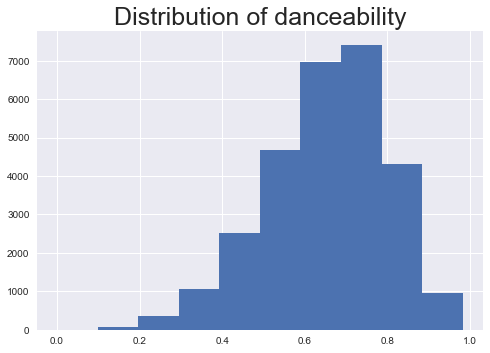

In [6]:
danceandpop['danceability'].hist()
plt.title('Distribution of danceability', fontsize = 25)

Text(0.5, 1.0, 'track_popularity Distribution')

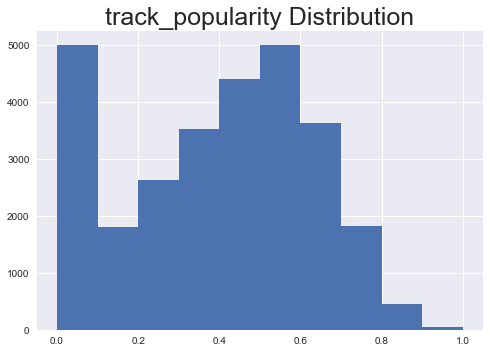

In [8]:
danceandpop['track_popularity'].hist()
plt.title('track_popularity Distribution', fontsize=25)

Text(0.5, 1.0, 'Danceability vs Track_popularity Scatterplot')

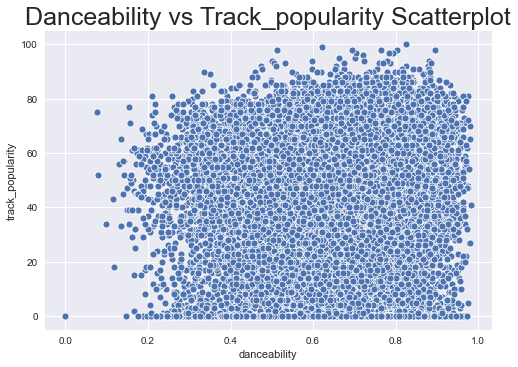

In [72]:
sns.scatterplot('danceability','track_popularity', data=df1)
plt.title('Danceability vs Track_popularity Scatterplot', fontsize=25)

In [22]:
danceandpop.corr()

danceability  track_popularity
danceability          1.000000          0.046597
track_popularity      0.046597          1.000000

The scatter plot and correlation score indicate little correlation between two variables. Hence, danceability does not contribute to a track popularity.

### 2.2 Which artist has the most number of popular songs?

Defining popular songs as the ones with track_popularity >= 0.7

In [23]:
artists = len(df1["track_artist"].unique())
print(f'There are {artists} artists in this dataset')

There are 10693 artists in this dataset


A track can be in multiple playlist with different kinds of genres. Therefore, we will only select information about a track.

In [10]:
# Select only tracks id information
tracks = df1.filter(regex=r"^(?!playlist).*", axis=1)
tracks.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms track_genre  
0          0.000000    0.0653    0.518  122.036       194754     pop,edm  
1          0.004210    0.3570    0.693   99.972       162600     pop,edm  
2          0.000023    0.1100    0.613  124.008       176616     pop,edm  
3          0.000009    0.2040    0.277  121.956       169093         pop  
4          0.000000    0.0833    0.725  123.976       189052         pop

In [11]:
# Remove duplicates
popular_songs = df1.loc[df1['track_popularity'] >= 0.7]

(25736, 24)

In [12]:
# Rank artist by the count of their popular songs
popRank = popular_songs.groupby('track_artist').size().sort_values(ascending=False)


Queen is the artist with the most number of popular songs. Let's see what are his most popular songs

In [15]:
mostpop = popRank.index[0]
queen = df1.loc[df1['track_artist'] == mostpop,['track_name','track_popularity']].\
sort_values(by='track_popularity', ascending=False).reset_index(drop=True)
display(queen.iloc[0:10,:])

track_name  track_popularity
0                      Bohemian Rhapsody - 2011 Mix                84
1                      Don't Stop Me Now - 2011 Mix                83
2      Another One Bites The Dust - Remastered 2011                82
3                       Under Pressure - Remastered                81
4                     We Will Rock You - Remastered                79
5            We Are The Champions - Remastered 2011                76
6                      Bohemian Rhapsody - 2011 Mix                76
7                      Don't Stop Me Now - 2011 Mix                75
8      Another One Bites The Dust - Remastered 2011                74
9  Crazy Little Thing Called Love - Remastered 2011                74

In [16]:
print(f'The number of queen track is {queen.shape[0]}')

The number of queen track is 130


There are 130 Queen's tracks on Spotify. Among them, Bohemian Rhapsody is Queen's most popular track on Spotify. 

### 2.3 What are the top artists that own most popular songs and their genres on Spotify?

In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Define Custom Class for our own widget
class Negative(Exception):
    def __init__(self, message="Number of artists must be greater than 0"):
        self.message = message
        super().__init__(self.message)

In [18]:
# Top n artists with their popular song count
print('Top n artists with the count of their popular songs')
def top_n(n:int) -> pd.Series:
    if n <= 0:
        raise Negative
    return popRank[:n]
interact(top_n, n=widgets.IntSlider(min=1, max=50, step=1, value=10))

Top n artists with the count of their popular songs


interactive(children=(IntSlider(value=10, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.top_n(n: int) -> pandas.core.series.Series>

In [30]:
# # Top n artists with their track_info
# def top_artists(n: int) -> pd.DataFrame:
#     print(f'Retrieving track info from top {n} artists ...')
#     top50artists = popRank.index[:n]
#     top50 = df1.loc[df1.track_artist.isin(top50artists),:]
#     return top50
# print('Select top n artists to display')
# interact(top_artists, n=widgets.IntSlider(min=1, max=50, step=1, value=20))

### 2.4 Top 50 songs by popularity and their genre distribution

In [20]:
# Filtering tracks of top50 artists from original dataframe
# since we need playlist_genre information
top50 = df1.sort_values(by='track_popularity', ascending=False).iloc[0:50,:]
def top50_songs(n: int) -> pd.Series:
    return top50[['track_artist','track_name']].iloc[:n,:].reset_index(drop=True)
print('Select n top songs to display:')
interact(top50_songs, n=widgets.IntSlider(min=1, max=50, step=1, value=10))

Select n top songs to display:


interactive(children=(IntSlider(value=10, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.top50_songs(n: int) -> pandas.core.series.Series>

In [21]:
genres_dist = top50.track_genre.values

In [22]:
genres_dist = [x.split(',') for x in genres_dist]
genres_dist = [val for x in genres_dist for val in x]

In [23]:
dist = Counter(genres_dist)
x = list(dist.keys())
y = list(dist.values())
dist = {'Genres': x, 'Frequency': y}
dist

{'Genres': ['pop', 'latin', 'r&b', 'edm', 'rap', 'rock'],
 'Frequency': [36, 42, 45, 40, 16, 1]}

In [24]:
fig = px.bar(dist, x='Genres', y='Frequency', title='Top50 Popular Songs Genre Distribution')
fig.show()

There are tracks that belong to multiple genres, which is why the total count of Genres is greater than 50. From the plot above, r&b is the genre that the top 50 popular songs in Spotify fall into. Interestingly, latin is the second rank genre for these top 50 songs.

### 2.5 Top popular songs by year

In [25]:
df1.track_album_release_date = pd.to_datetime(df1.track_album_release_date)


In [26]:
df1['Year'] = df1.track_album_release_date.dt.to_period('Y')
df1['Month'] = df1.track_album_release_date.dt.month
df1['Year'] = df1.Year.dt.strftime('%Y')

In [27]:
popular_songs = df1.loc[df1['track_popularity'] >= 0.7]


In [28]:
popular_songs = popular_songs.loc[popular_songs.track_popularity >= 0.7,:]
popRankbyYear = popular_songs.groupby(['Year','track_artist']).size()


In [29]:
pattern = re.compile(r"([Rr]emastered)(\s)(\d{4})")
tracking = {}
for idx, track in enumerate(popular_songs.track_name.values):
    tracking[idx] = [track, popular_songs.iloc[idx, :]]
    if re.search(pattern, track):
        year = re.search(pattern, track).group(3)
        popular_songs.iloc[idx, 24] = int(year)

In [30]:
df_popRankbyYear = popRankbyYear.to_frame()
df_popRankbyYear.rename(columns={'size':'no. popular tracks'})
df_popRankbyYear.columns = ['no. popular tracks']

In [31]:
def rankByYear(n: int, year: int) -> pd.Series:
    year = str(year)
    return df_popRankbyYear[df_popRankbyYear.index.get_level_values(0) == year].sort_values(by='no. popular tracks',ascending=False)[:n]

interact(rankByYear, year=widgets.Dropdown(
                        options=list(df_popRankbyYear.index.get_level_values(0).unique()),
                        value='2010',
                        description='Year:'),
                    n=widgets.IntSlider(min=0, max=50,step=1,value=5, description='Top n artists:'))

interactive(children=(IntSlider(value=5, description='Top n artists:', max=50), Dropdown(description='Year:', …

<function __main__.rankByYear(n: int, year: int) -> pandas.core.series.Series>

### 2.6 Top Artists and Genre distribution

In [70]:
# Widgets
min_year = int(min(df_popRankbyYear.index.get_level_values(0).unique()))
max_year = int(max(df_popRankbyYear.index.get_level_values(0).unique()))
year = widgets.IntSlider(
    value=2020,
    min=min_year,
    max=max_year,
    step=1,
    description='Year:',
    continuous_update=False)
n = widgets.IntSlider(
value=10,
min=1,
max=30,
step=1,
description='Top n artists:',
continuous_update=False)
container1 = widgets.VBox([year, n])

# Plots
Year = 2020
topartists = list(rankByYear(n=5, year=Year).index.get_level_values(1))
topByYear = popular_songs.loc[((popular_songs.track_artist.isin(topartists)) & (popular_songs.Year==str(year))),:]
genres_dist = topByYear.track_genre.values
genres_dist = [x.split(',') for x in genres_dist]
genres_dist = [val for x in genres_dist for val in x]
genres_dist = Counter(genres_dist)
x = list(genres_dist.keys())
y = list(genres_dist.values())
dist = {'Genres': x, 'Frequency': y}
fig = go.Bar(x=y, y=x, orientation='h')
g = go.FigureWidget(data=[fig],
                    layout=go.Layout(
                        title=dict(
                            text=f'Genre distribution in {year.value} for top {n.value} artists'
                        ),
                        barmode='overlay',
                        xaxis_title = 'Frequency',
                        yaxis_title = 'Genre'
                    ))

def response(change):
    topartists = list(rankByYear(n=n.value, year=year.value).index.get_level_values(1))
    topByYear = popular_songs.loc[((popular_songs.track_artist.isin(topartists)) & (popular_songs.Year==str(year.value))),:]
    genres_dist = topByYear.track_genre.values
    genres_dist = [x.split(',') for x in genres_dist]
    genres_dist = [val for x in genres_dist for val in x]
    genres_dist = Counter(genres_dist)
    x = list(genres_dist.keys())
    y = list(genres_dist.values())
    with g.batch_update():
        g.data[0].x = y
        g.data[0].y = x
        g.layout.title = f'Genre distribution in {year.value} for top {n.value} artists'
        g.layout.xaxis.title = 'Frequency'
        g.layout.yaxis.title = 'Genre'

year.observe(response, names='value')
n.observe(response, names='value')


container2 = widgets.HBox([container1, g])
container2        

## 3. What Explains Popularity of Tracks?

We'll fit decision trees to find important features the contribute to the prediction of a track popularity

In [37]:
trackByYear = df1.groupby('Year').size()
trackByYear.head()

Year
1957    2
1958    1
1960    4
1961    1
1962    1
dtype: int64

Some years have only 1 or 2 tracks recorded. We'll eliminate any years with fewer than 50 tracks recorded.

In [38]:
trackByYear = trackByYear[trackByYear >= 50] # Sort year with more than 50 tracks recorded
trackByYear.index = trackByYear.index.to_series().astype(str) # turn period into str column for easy processing

In [39]:
years = trackByYear.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='Year')

In [41]:
# Filter years with fewer than 50 tracks from df1
df1_filtered = df1.loc[df1.Year.isin(years)]

### 3.1 Feature Selection

In [43]:
df2_filtered1 = df1_filtered.iloc[:,11:]
df2_filtered1['track_popularity'] = df1_filtered['track_popularity']
df2_filtered1.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms track_genre  \
0          0.000000    0.0653    0.518  122.036       194754     pop,edm   
1          0.004210    0.3570    0.693   99.972       162600     pop,edm   
2          0.000023    0.1100    0.613  124.008       176616     pop,edm   
3          0.000009    0.2040    0.277  121.956       169093         pop   
4          0.000000    0.0833    0.725  123.976       189052         pop   

   Year  Month  track_popularity  
0  2019      6                66  
1  2019     12                67  
2  2019      7                70  
3  2019      7                60  
4  2019      3                69

key is a categorical variable so we'll one hot encode it. 

In [44]:
onehot_trackgenre = pd.get_dummies(df2_filtered1['track_genre'], prefix='genre', drop_first=True)
onehot_key = pd.get_dummies(df2_filtered1['key'], prefix='key', drop_first=True)

In [51]:
num_vars = [idx for idx, x in zip(df1.dtypes.index, df1.dtypes.values) if x != 'object']

['track_popularity',
 'track_album_release_date',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'Month']

In [56]:
num_vars = [idx for idx, x in zip(df2_filtered1.dtypes.index, df2_filtered1.dtypes.values) if x != 'object']
num_vars = [x for x in num_vars if x not in ['key','mode', 'track_popularity']]
target_var = 'track_popularity'

In [57]:
corrs = df2_filtered1[num_vars].corr()

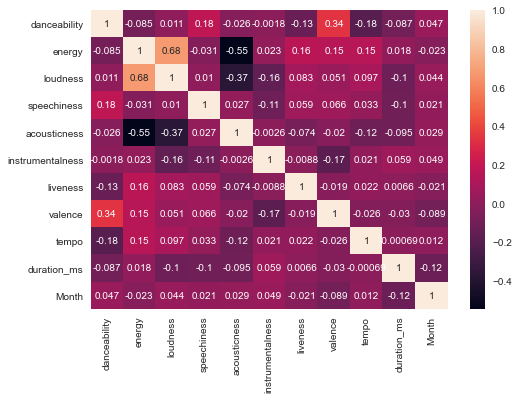

In [58]:
sns.heatmap(corrs, annot=True)

Most values are not correlated with each other. Energy and loudness does correlate with a score of 0.68. We'll fit two models with that either include both or include one of two.

In [56]:
num_var1 = [x for x in num_vars if x != 'loudness']


In [60]:
df2_filtered2 = pd.concat([df2_filtered1, onehot_trackgenre], axis=1)
df2_filtered2 = pd.concat([df2_filtered2, onehot_key], axis=1)
df2_filtered2.drop(['track_genre','key'], axis=1, inplace=True)

In [61]:
# Select numerical features for standardization
pattern = re.compile('^genre.*')
genre = [x for x in list(df2_filtered2.columns) if re.match(pattern, x)]
vars_toprocess = [x for x in num_vars if x not in genre and x not in ['Year','Month','mode']]
features_processing = df2_filtered2[vars_toprocess]
# features_processing.head()

In [62]:
scaler = StandardScaler()
scaler.fit(features_processing)
features_processed = scaler.transform(features_processing)
df2_filtered2[vars_toprocess] = features_processed
# df2_filtered2.head()

### 3.2 DecisionTree by Year


#### 3.2.1 All features

In [69]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
# target_var = df2_filtered2.track_popularity
# df2_filtered3 = df2_filtered2.drop(['track_popularity'], axis=1)    
# regressor = tree.DecisionTreeRegressor()
# regressor.fit(df2_filtered3, target_var)
# preds = regressor.predict(df2_filtered3)
# rsquared = r2_score(target_var, preds)

In [104]:
# Widgets
min_year = int(min(df2_filtered2.Year.unique()))
max_year = int(max(df2_filtered2.Year.unique()))
year = widgets.IntSlider(
    value=2014,
    min=min_year,
    max=max_year,
    step=1,
    description='Year:',
    continuous_update=False)
n = widgets.IntSlider(
value=10,
min=1,
max=30,
step=1,
description='Top n features:',
continuous_update=False)
# Defining layout
container1 = widgets.VBox([year, n])

# Plots
Year = 2014
df2_filtered3 = df2_filtered2.loc[df2_filtered2.Year == str(Year),:]
target_var = df2_filtered3['track_popularity']
df2_filtered3 = df2_filtered3.drop(['Year','Month', 'track_popularity'], axis=1)
regressor = tree.DecisionTreeRegressor()
regressor.fit(df2_filtered3, target_var)
preds = regressor.predict(df2_filtered3)
rsquared = r2_score(target_var, preds)
importances = regressor.feature_importances_
indices = np.argsort(importances)[-10:]
features = df2_filtered3.columns[indices]
scores = importances[indices]
fig = go.Bar(x=scores, y=features, orientation='h')
g = go.FigureWidget(data=[fig],
                    layout=go.Layout(
                        title=dict(
                            text=f'Feature importances in {year.value}'
                        ),
                        barmode='overlay',
                        xaxis_title = 'Score',
                        yaxis_title = 'Features'
                    ))

def response(change):
    df2_filtered3 = df2_filtered2.loc[df2_filtered2.Year == str(year.value),:]
    target_var = df2_filtered3['track_popularity']
    df2_filtered3 = df2_filtered3.drop(['Year','Month', 'track_popularity'], axis=1)
    regressor = tree.DecisionTreeRegressor()
    regressor.fit(df2_filtered3, target_var)
    preds = regressor.predict(df2_filtered3)
    rsquared = r2_score(target_var, preds)
    importances = regressor.feature_importances_
    indices = np.argsort(importances)[-(n.value):]
    features = df2_filtered3.columns[indices]
    scores = importances[indices]
    with g.batch_update():
        g.data[0].x = scores
        g.data[0].y = features
        g.layout.title = f'Feature importances in {year.value}'
        g.layout.xaxis.title = 'Score'
        g.layout.yaxis.title = 'Features'

year.observe(response, names='value')
n.observe(response, names='value')

# Defining layout
container2 = widgets.HBox([container1, g])
container2 